<center><h1>DSCI_552_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data (KNN)</font></center>

### Name: Hui Qi
### Github Username: yufeifeiqiqi
### USC ID: 3206742781

### (a) Download Data

Package imports

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


Get the Vertebral Column Data Set

In [2]:
data = arff.loadarff("../data/vertebral_column_data/column_2C_weka.arff")
df = pd.DataFrame(data[0])
df
#print(df)
# https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419/10

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [3]:
# group by the class and count AB and NO
# https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/

print(df.groupby(["class"])["class"].count())

class
b'Abnormal'    210
b'Normal'      100
Name: class, dtype: int64


In [4]:
# replace class NO by 0, AB by 1
# https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas
# In python, the ‘b‘ character before a string is used to specify the string as a “byte string“.
# https://stackoverflow.com/questions/37016946/remove-b-character-do-in-front-of-a-string-literal-in-python-3
# https://www.geeksforgeeks.org/effect-of-b-character-in-front-of-a-string-literal-in-python/
# https://towardsdatascience.com/check-for-a-substring-in-a-pandas-dataframe-column-4b949f64852
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

df["class"] = df["class"].str.decode("utf-8") # series.str ; convert byte string to string
df.loc[df["class"] == "Abnormal",["class"]]= 1
df.loc[df["class"] == "Normal",["class"]] =0

df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


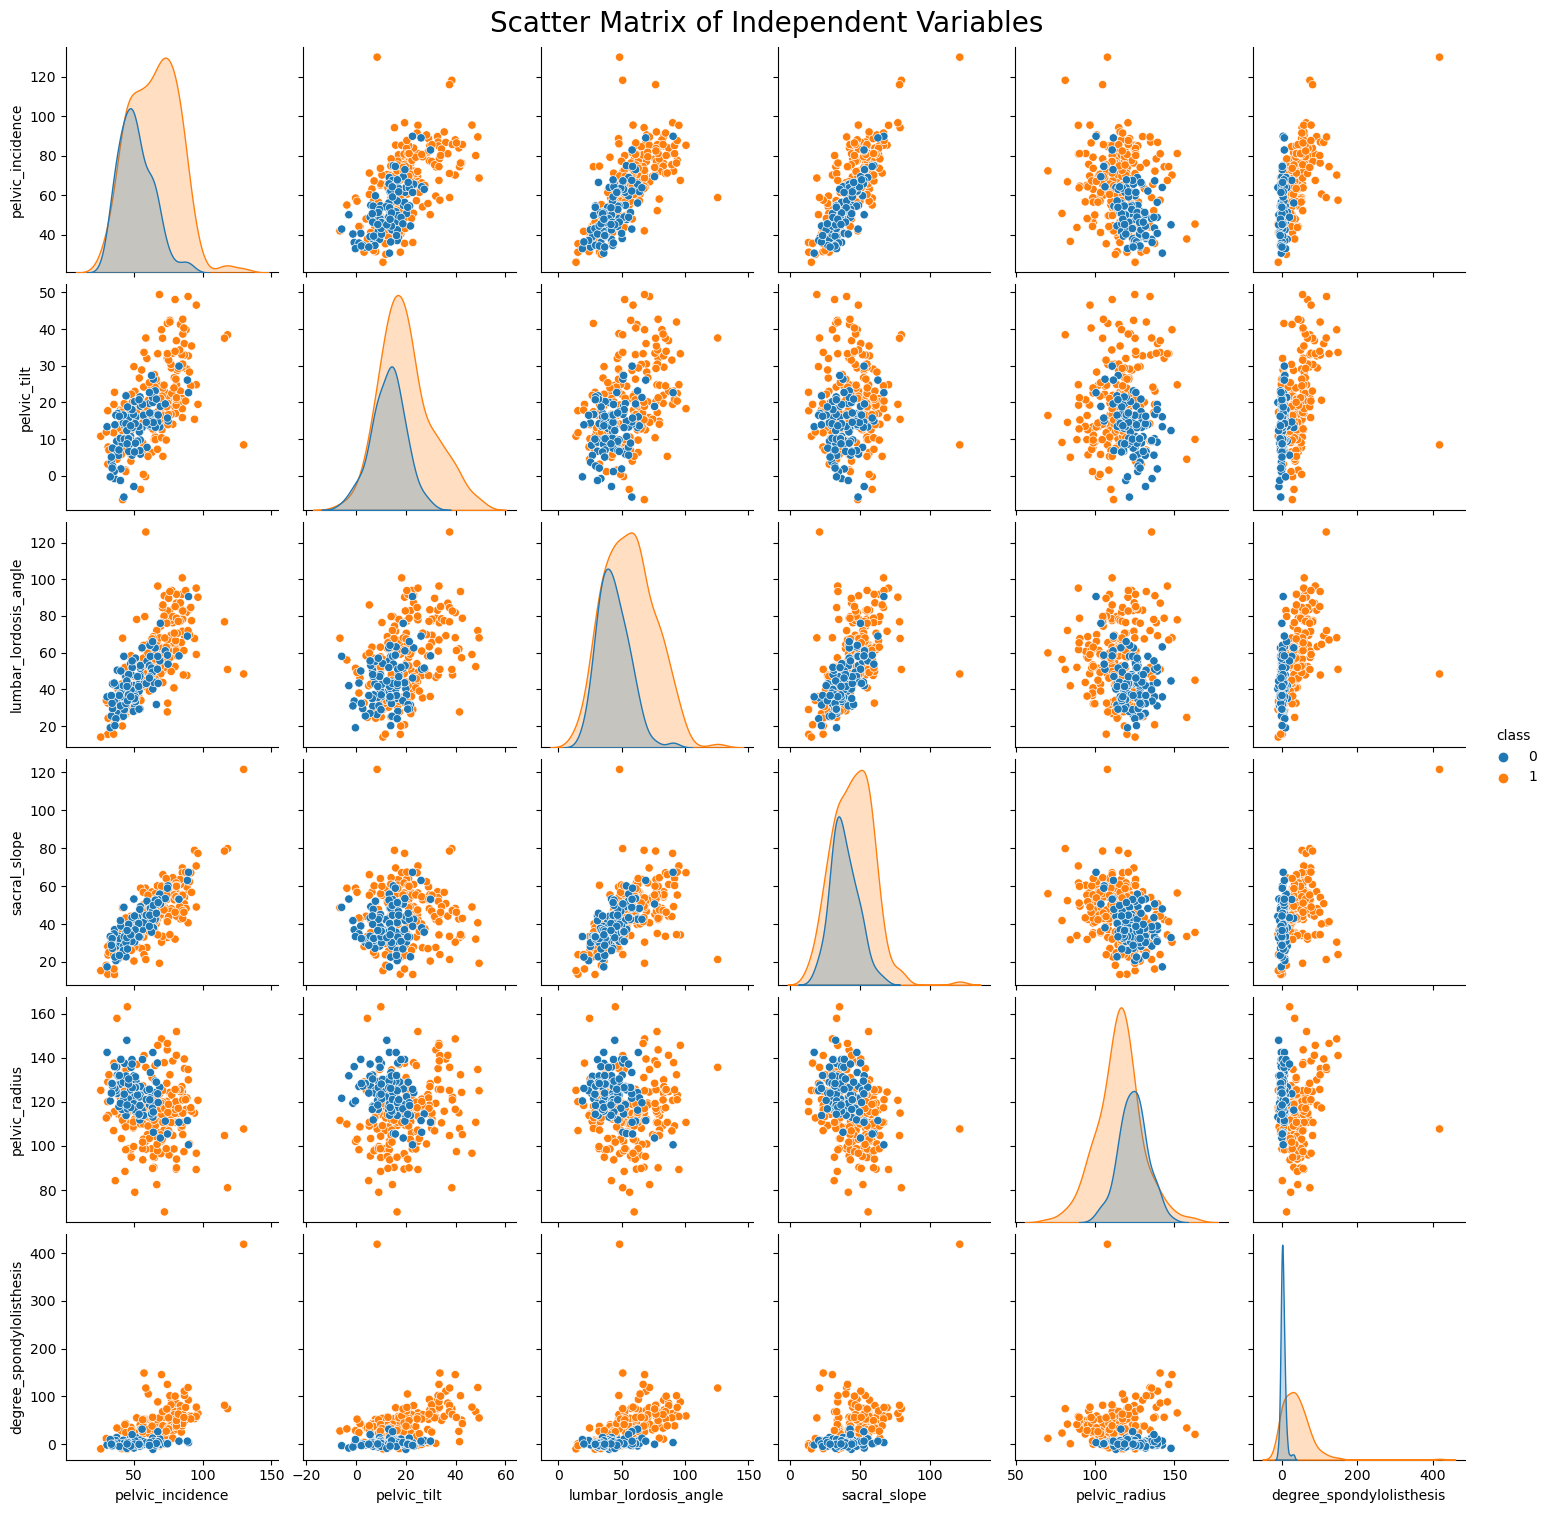

In [5]:
# plot scatter matrix using seaborn
# https://www.geeksforgeeks.org/scatter-plot-matrix/
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

figure1 = sns.pairplot(df, hue='class')
figure1.fig.suptitle("Scatter Matrix of Independent Variables", fontsize = 20,y=1.01,x = 0.5)
plt.show()

#### ii. Boxplots

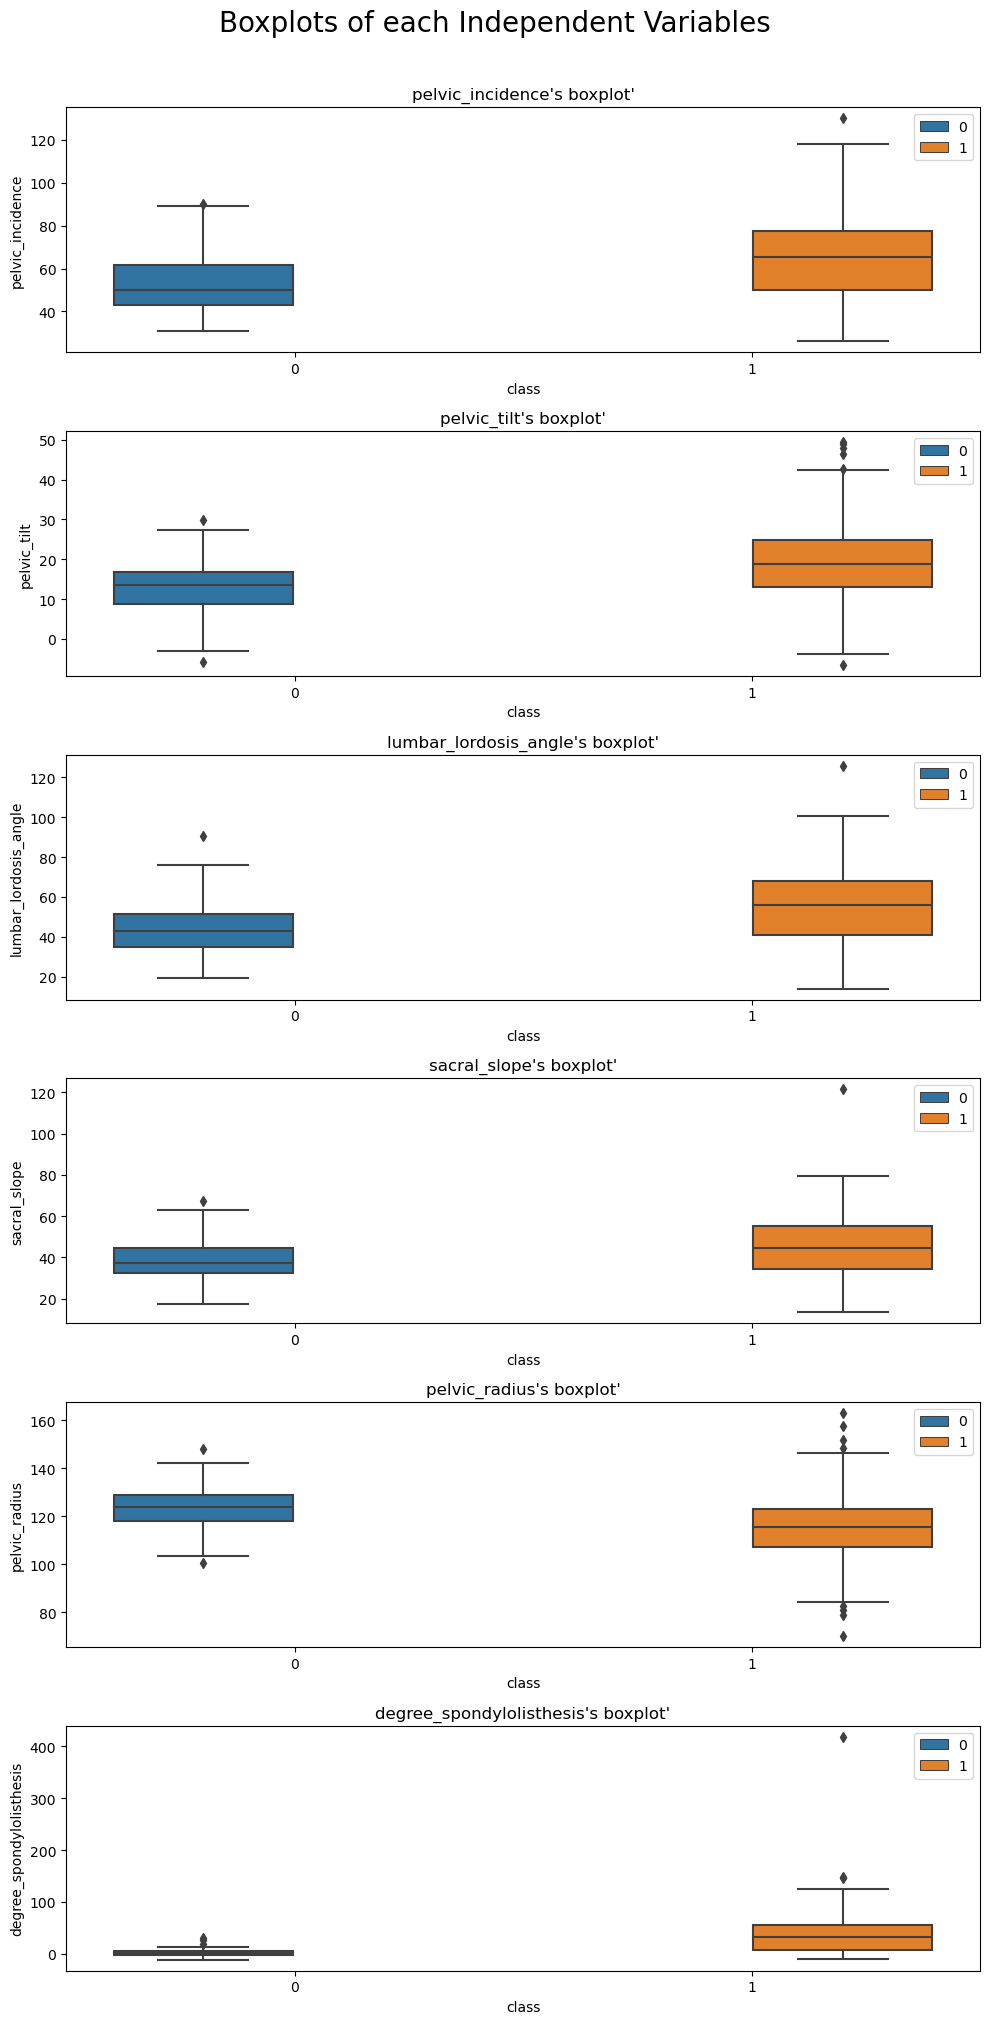

In [6]:
# https://wellsr.com/python/how-to-make-seaborn-boxplots-in-python/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

fig,axes=plt.subplots(nrows=6,ncols=1,figsize=(10,20))
# Title for the entire plot
fig.suptitle("Boxplots of each Independent Variables",fontsize=20,y = 1.01)
for i in range(6):
    axes[i].set_title(f"{df.columns[i]}'s boxplot'")
    sns.boxplot(x = "class", y = f"{df.columns[i]}", data = df, hue = "class", ax = axes[i])
    axes[i].legend(loc = "upper right")
plt.tight_layout()
plt.show()

#### iii. Split Data Set
Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.


In [7]:
df_train_0  = df[df["class"]==0].iloc[:70]
df_test_0 = df[df["class"]==0].iloc[70:]
# print(df_train_0 ) 
# print(df_test_0)


In [8]:
df_train_1  = df[df["class"]==1].iloc[:140]
df_test_1 = df[df["class"]==1].iloc[140:]
# print(df_train_1 ) 
# print(df_test_1)
# print(type(df_train_1))

In [9]:
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html
df_train = pd.concat([df_train_0, df_train_1], ignore_index = True)
print(df_train)

df_test = pd.concat([df_test_0, df_test_1], ignore_index = True)
print(df_test)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           38.505273    16.964297              35.112814     21.540976   
1           54.920858    18.968430              51.601455     35.952428   
2           44.362490     8.945435              46.902096     35.417055   
3           48.318931    17.452121              48.000000     30.866809   
4           45.701789    10.659859              42.577846     35.041929   
..                ...          ...                    ...           ...   
205         77.121344    30.349874              77.481083     46.771470   
206         88.024499    39.844669              81.774473     48.179830   
207         83.396606    34.310989              78.423293     49.085617   
208         72.054034    24.700737              79.874016     47.353297   
209         85.095503    21.069897              91.734792     64.025606   

     pelvic_radius  degree_spondylolisthesis class  
0       127.632875                  7.986683  

In [10]:
X_train, y_train = df_train.iloc[:, 0:-1], df_train.iloc[:,-1]
X_test, y_test = df_test.iloc[:,0:-1], df_test.iloc[:,-1]
type(y_train)
y_train = y_train.astype(str).astype(int)
y_test = y_test.astype(str).astype(int)
# https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

### (c) Classification

#### i. Euclidean Metric

In [11]:
# https://realpython.com/knn-python/
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
# https://www.kaggle.com/code/spoorthi91/knn-using-euclidean-distance-from-scratch
# https://scikit-learn.org/stable/modules/neighbors.html
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [12]:
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")

#### ii. Test Data

In [13]:
'''
https://stats.stackexchange.com/questions/367010/training-error-in-knn-classifier-when-k-1
https://stackoverflow.com/questions/52687493/find-the-training-and-test-error-in-my-self-implemented-knn-algorithm

'''
# create a set of k values and an empty list for training and testing accuracy scores
k_values=[i for i in range(208,0,-3)]
# scores here are the accuracy (predictive result / actural result) , error will be 1-accuracy
train_scores=[]
test_scores=[]
min_k, min_error = float("inf"), float("inf")

for k in k_values:
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric = "euclidean")
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    #Predict the responses for tain and test dataset
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    train_score = metrics.accuracy_score(y_train, y_pred_train)
    test_score = metrics.accuracy_score(y_test, y_pred)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    if (1-test_score) < min_error:
        min_error = 1-test_score
        min_k = k

train_errors = 1-np.array(train_scores)
test_errors = 1-np.array(test_scores)
#print(test_error)  

# which is the most suitable k? finding the k* having lowest test error
print(f"Optimal value of k is {min_k} and lowest test error is {min_error} at this optimal k value")

    

Optimal value of k is 4 and lowest test error is 0.06000000000000005 at this optimal k value


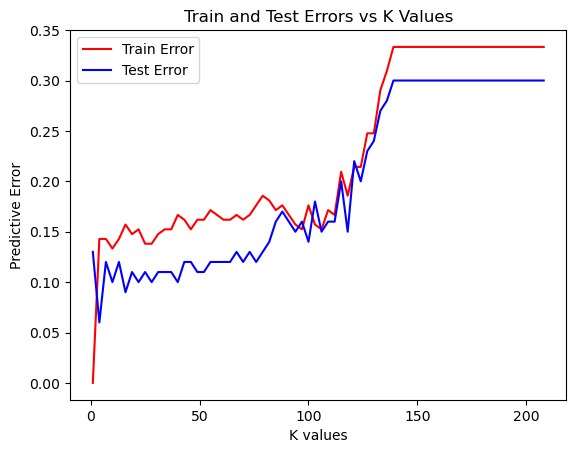

In [14]:
# Plot train and test errors in terms of k 
# https://medium.com/@prince54shaw/k-nearest-neighbors-k-nn-part-2-ec48b4a4005
plt.plot(k_values, train_errors, color = "r", label = "Train Error")
plt.plot(k_values, test_errors, color = "b", label = "Test Error")
plt.xlabel("K values")
plt.ylabel("Predictive Error")
plt.title("Train and Test Errors vs K Values")
plt.legend()
plt.show()

In [15]:
# confusion matrix, true positive rate, true negative rate, precision, and F1-score at k = k*
# https://plainenglish.io/blog/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-b57f85d05cd8
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

best_knn = KNeighborsClassifier(n_neighbors = min_k) 
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
print(f"(tn, fp, fn, tp) is {(tn, fp, fn, tp)}")
print(f"True positive rate is {tp/(tp+fn)} and true negative rate is {tn/(fp+tn)}.")
print(f"Precision is {tp/(tp+fp)}.")

f1= f1_score(y_test, y_pred_best)
print(f"F1 Score is {f1}.")

Confusion Matrix:
 [[25  5]
 [ 1 69]]
(tn, fp, fn, tp) is (25, 5, 1, 69)
True positive rate is 0.9857142857142858 and true negative rate is 0.8333333333333334.
Precision is 0.9324324324324325.
F1 Score is 0.9583333333333333.


#### iii. Learning Curve

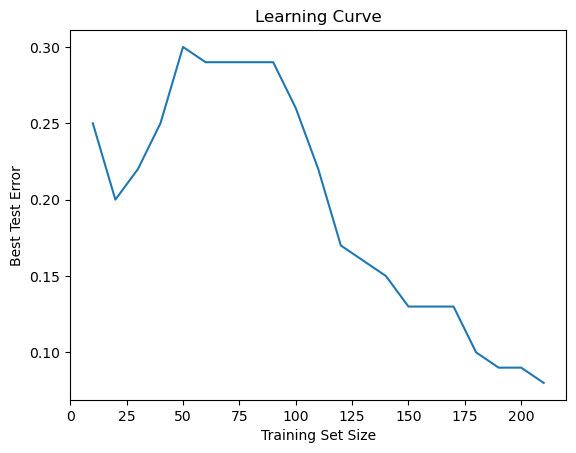

In [16]:
training_values = [i for i in range(10,220,10)]
test_best_errors_new = []

for N in training_values:
    class0_num_rows = math.floor(N/3)
    class1_num_rows = N - math.floor(N/3)
    
    
    df_train_0_new = df[df["class"]==0].iloc[:class0_num_rows]
    df_train_1_new = df[df["class"]==1].iloc[:class1_num_rows]
    
    df_train_new = pd.concat([df_train_0_new, df_train_1_new], ignore_index = True)
    #print(df_train_new.shape)
    #print(df_train_new)
    
    X_train_new, y_train_new = df_train_new.iloc[:, 0:-1], df_train_new.iloc[:,-1]
    y_train_new = y_train_new.astype(str).astype(int)
    
    min_k, min_error = float("inf"), float("inf")
    
    for k in range(1, N, 5):
        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric = "euclidean")
        #Train the model using the training sets
        knn.fit(X_train_new, y_train_new)

        #Predict the responses for tain and test dataset
        #y_pred_train = knn.predict(X_train_new)
        y_pred = knn.predict(X_test)
        

        #train_score = metrics.accuracy_score(y_train_new, y_pred_train)
        test_score = metrics.accuracy_score(y_test, y_pred)
        
        # if multiple optimal K for the same N, choose largest K
        if (1-test_score) <= min_error:
            min_error = 1-test_score
            min_k = k
    #print(min_error,min_k)
    test_best_errors_new.append(min_error)
    

plt.plot(training_values, test_best_errors_new)
plt.xlabel("Training Set Size")
plt.ylabel("Best Test Error")
plt.title("Learning Curve")
plt.show()  
    
    

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

Best k value is 26 and test error rate is 0.10999999999999999 for Manhattan Distance with p = 1.


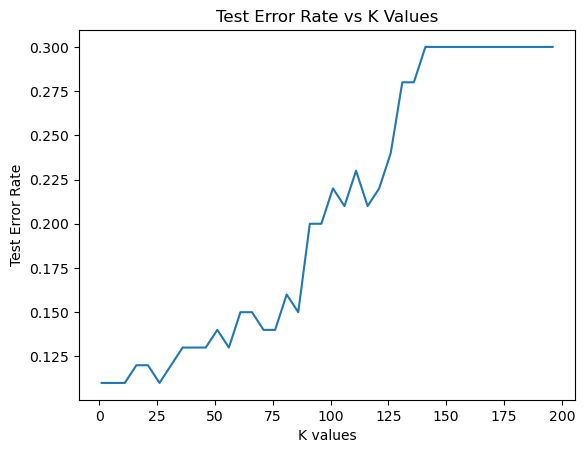

In [17]:
min_k, min_error = float("inf"), float("inf")
k_values = [i for i in range(1,200,5)]
test_errors = []

for k in range(1, 200, 5):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    #Predict the responses for tain and test dataset
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    test_score = metrics.accuracy_score(y_test, y_pred)
    test_errors.append(1-test_score)
    #print(k,1-test_score)
    if (1-test_score) <= min_error:
        min_error = (1-test_score)
        min_k = k
        #print(min_k)
        #print(min_error)
#print(min_k, min_error)
#print(min_error)
print(f"Best k value is {min_k} and test error rate is {min_error} for Manhattan Distance with p = 1.")        

plt.plot(k_values, test_errors)
plt.xlabel("K values")
plt.ylabel("Test Error Rate")
plt.title("Test Error Rate vs K Values")
plt.show()   

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [18]:
k_log = np.arange(0.1, 1.1, 0.1)
p_log = np.power(10, k_log)
#p_log
min_k

26

At log10(p) = 0.10000000000000002, we get the lowest test error rate of 0.09999999999999998
At log10(p) = 0.20000000000000004, we get the lowest test error rate of 0.09999999999999998
At log10(p) = 0.4, we get the lowest test error rate of 0.09999999999999998
At log10(p) = 0.6, we get the lowest test error rate of 0.09999999999999998


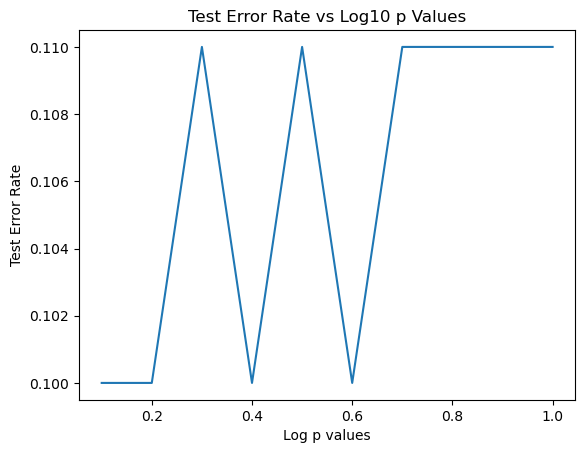

In [19]:
test_errors = []
min_error = float("inf")
for p in p_log:
    knn = KNeighborsClassifier(n_neighbors=min_k, p=p, metric='minkowski')
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    #Predict the responses for tain and test dataset
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    test_score = metrics.accuracy_score(y_test, y_pred)
    test_errors.append(1-test_score)
    #print(p,1-test_score)
    
    if (1-test_score) <= min_error:
        min_error = 1-test_score
        bestlogp = math.log10(p)
        print(f"At log10(p) = {bestlogp}, we get the lowest test error rate of {min_error}")

plt.plot(k_log, test_errors)
plt.xlabel('Log p values')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rate vs Log10 p Values')
plt.show()

##### C. Chebyshev Distance With p -> infinity.

At k = 16, we get the lowest test error rate of 0.07999999999999996 under Chebyshev Distance
 with p going to infinity.


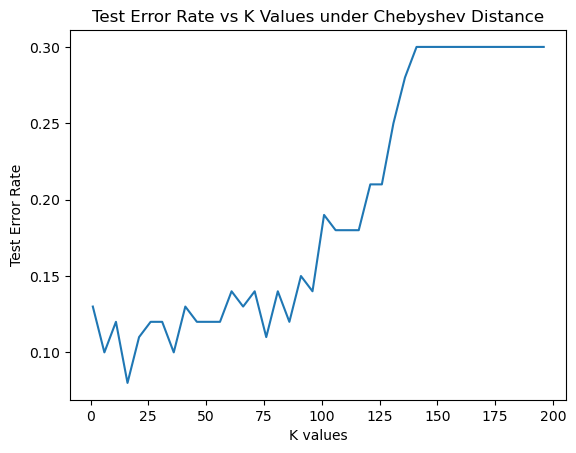

In [20]:
min_k, min_error = float("inf"), float("inf")
k_values = [i for i in range(1,200,5)]
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=float("inf"), metric='minkowski')
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    #Predict the responses for tain and test dataset
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    test_score = metrics.accuracy_score(y_test, y_pred)
    test_errors.append(1-test_score)
    #print(k,1-test_score)
    if (1-test_score) <= min_error:
        min_error = (1-test_score)
        min_k = k
        #print(min_error, min_k)
print(f"At k = {min_k}, we get the lowest test error rate of {min_error} under Chebyshev Distance\n with p going to infinity.")

plt.plot(k_values, test_errors)
plt.xlabel('K values')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rate vs K Values under Chebyshev Distance')
plt.show()

#### ii. Mahalanobis Distance.

At k = 1, we get the lowest test error rate of 0.15000000000000002 under Mahalanobis Distance


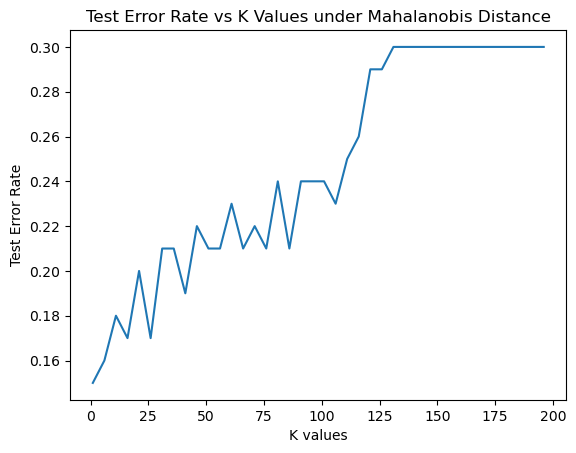

In [21]:
# https://www.machinelearningplus.com/statistics/mahalanobis-distance/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
# https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics
# https://datascience.stackexchange.com/questions/113758/knn-using-mahalanobis-distance-gives-low-score
# https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html
# https://stackoverflow.com/questions/33333743/unable-to-calculate-mahalanobis-distance

min_k, min_error = float("inf"), float("inf")
k_values = [i for i in range(1,200,5)]
test_errors = []

# using pseudoinverse (pinv) instead of an inverse (inv)
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html
for k in k_values:
    mahalanobis_knn = KNeighborsClassifier(n_neighbors=k, 
                                        metric='mahalanobis', 
                                        metric_params={'VI': (np.linalg.pinv(np.cov(X_train, rowvar =False)))}
                                                               )
    #Train the model using the training sets
    mahalanobis_knn.fit(X_train, y_train)
    
    #Predict the responses for tain and test dataset
    y_pred_train = mahalanobis_knn.predict(X_train)
    y_pred = mahalanobis_knn.predict(X_test)
    
    test_score = metrics.accuracy_score(y_test, y_pred)
    test_errors.append(1-test_score)
    #print(k,1-test_score)
    if (1-test_score) <= min_error:
        min_error = (1-test_score)
        min_k = k
        #print(min_error, min_k)
print(f"At k = {min_k}, we get the lowest test error rate of {min_error} under Mahalanobis Distance" )


plt.plot(k_values, test_errors)
plt.xlabel('K values')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rate vs K Values under Mahalanobis Distance')
plt.show()

### (e) Weighted Decision

In [22]:
# https://visualstudiomagazine.com/articles/2019/04/01/weighted-k-nn-classification.aspx#:~:text=The%20weighted%20k%2Dnearest%20neighbors,or%20more%20numeric%20predictor%20variables.



# Euclidean

k_values=[i for i in range(1,200,5)]

test_errors=[]
min_k, min_error = float("inf"), float("inf")

for k in k_values:
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric = "euclidean", weights = "distance")
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    #Predict the responses for tain and test dataset
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    test_score = metrics.accuracy_score(y_test, y_pred)
    test_errors.append(1-test_score)
    
    if (1-test_score) <= min_error:
        min_error = 1-test_score
        min_k = k
print(f"At k = {min_k}, the best test error is {min_error} under Euclidean weighted distance.")



At k = 6, the best test error is 0.09999999999999998 under Euclidean weighted distance.


In [23]:
# Manhattan


k_values=[i for i in range(1,200,5)]
test_errors=[]
min_k, min_error = float("inf"), float("inf")

for k in k_values:
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric = "manhattan", weights = "distance")
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    #Predict the responses for tain and test dataset
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    test_score = metrics.accuracy_score(y_test, y_pred)
    test_errors.append(1-test_score)
    
    if (1-test_score) <= min_error:
        min_error = 1-test_score
        min_k = k
print(f"At k = {min_k}, the best test error is {min_error} under Manhattan weighted distance.")

At k = 26, the best test error is 0.09999999999999998 under Manhattan weighted distance.


In [24]:
# Chebyshev

k_values=[i for i in range(1,200,5)]
test_errors=[]
min_k, min_error = float("inf"), float("inf")

for k in k_values:
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, p=float("inf"), metric='minkowski', weights = "distance")
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    #Predict the responses for tain and test dataset
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    test_score = metrics.accuracy_score(y_test, y_pred)
    test_errors.append(1-test_score)
    
    if (1-test_score) <= min_error:
        min_error = 1-test_score
        min_k = k
print(f"At k = {min_k}, the best test error is {min_error} under Chebyshev weighted distance.")

At k = 61, the best test error is 0.10999999999999999 under Chebyshev weighted distance.


### (f) Training Error Rate

<font size="4">
    The lowest training error is 0.0 at k=1. 
For k=1, when classifying a sample from traning set, since the test sample is in the training sample, it will be classified by itself. Thus, the classification will be always correct and training error will be 0.
</font>


### Reference

https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419/10<br>
https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas<br>
https://stackoverflow.com/questions/37016946/remove-b-character-do-in-front-of-a-string-literal-in-python-3<br>
https://www.geeksforgeeks.org/effect-of-b-character-in-front-of-a-string-literal-in-python/<br>
https://towardsdatascience.com/check-for-a-substring-in-a-pandas-dataframe-column-4b949f64852<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html<br>
https://www.geeksforgeeks.org/scatter-plot-matrix/<br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html<br>
https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid<br>
https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html<br>
https://wellsr.com/python/how-to-make-seaborn-boxplots-in-python/<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html<br>
https://pandas.pydata.org/docs/reference/api/pandas.concat.html<br>
https://realpython.com/knn-python/<br>
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn<br>
https://www.kaggle.com/code/spoorthi91/knn-using-euclidean-distance-from-scratch<br>
https://scikit-learn.org/stable/modules/neighbors.html<br>
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn<br>
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn<br>
https://stats.stackexchange.com/questions/367010/training-error-in-knn-classifier-when-k-1<br>
https://stackoverflow.com/questions/52687493/find-the-training-and-test-error-in-my-self-implemented-knn-algorithm<br>
https://plainenglish.io/blog/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-b57f85d05cd8<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html<br>
https://www.machinelearningplus.com/statistics/mahalanobis-distance/<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html<br>
https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics<br>
https://datascience.stackexchange.com/questions/113758/knn-using-mahalanobis-distance-gives-low-score<br>
https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html<br>
https://stackoverflow.com/questions/33333743/unable-to-calculate-mahalanobis-distance<br>
https://visualstudiomagazine.com/articles/2019/04/01/weighted-k-nn-classification.aspx#:~:text=The%20weighted%20k%2Dnearest%20neighbors,or%20more%20numeric%20predictor%20variables.<br>
https://github.com/rutujabhandigani/DSCI552-Machine-Learning/blob/main/homework-1-rutujabhandigani-main/notebook/Rutuja_Bhandigani_HW1.ipynb<br>
https://github.com/thegeorgejoseph/machine-learning/blob/master/HW1/notebook/Joseph_George_HW1.ipynb<br>